# Installing necessary Libraries

In [ ]:
!pip install pandas numpy nltk textblob transformers torch vaderSentiment tqdm seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# Import Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/uber.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   content               12000 non-null  object 
 2   score                 12000 non-null  int64  
 3   thumbsUpCount         12000 non-null  int64  
 4   reviewCreatedVersion  12000 non-null  object 
 5   at                    12000 non-null  object 
 6   appVersion            12000 non-null  int64  
 7   sentiment_label       12000 non-null  int64  
 8   sentiment_confidence  12000 non-null  float64
 9   score_negative        12000 non-null  float64
 10  score_neutral         12000 non-null  float64
 11  score_positive        12000 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


# Data Preprocessing

### Text Normalization

In [ ]:
import pandas as pd
import emoji
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (run once)
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load your data
df = pd.read_csv("uber.csv")

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Updated function: demojize + remove punctuation + lemmatize + stem
def clean_text(text):
    if isinstance(text, str):
        # Lowercase and remove punctuation
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Demojize
        text = emoji.demojize(text, language='en')

        # Tokenize
        tokens = word_tokenize(text)

        # Lemmatize and stem each token
        tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

        # Join back to string
        return ' '.join(tokens)
    return text

# Apply to the 'content' column
df['content'] = df['content'].apply(clean_text)

# Save the cleaned dataset
df.to_csv("uber.csv", index=False)

print("Demojizing, lemmatization, and stemming complete. Saved to 'uber.csv'.")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Demojizing, lemmatization, and stemming complete. Saved to 'uber.csv'.


### Handling Missing Data

In [ ]:
import pandas as pd

# Assuming you've already loaded your dataset
df = pd.read_csv("uber.csv")

# 1. Forward fill for object columns
df['content'] = df['content'].ffill()
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].ffill()

# 2. Clean and transform 'appversion'
# First, forward fill or fill with 0 if preferred
df['appVersion'] = df['appVersion'].ffill()

# Convert to string and split at the "." → get major version
df['appVersion'] = df['appVersion'].astype(str).str.split('.').str[0]

# Convert to integer
df['appVersion'] = pd.to_numeric(df['appVersion'], errors='coerce').fillna(0).astype(int)

df.to_csv("uber.csv", index=False)
# Optional: drop the original 'appversion' if not needed
# df.drop(columns=['appversion'], inplace=True)


### Timestamp processing

In [ ]:
import pandas as pd

# Load your data (assumes file is already read into df)
# df = pd.read_csv("uber.csv")

# Convert 'at' column to datetime, coercing errors (invalid dates become NaT)
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Optional: Sort by datetime if needed
df = df.sort_values(by='at')

df.to_csv("uber.csv", index=False)


# Identifying the Best Model for Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import torch
import torch.nn as nn
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# ============================
# 1. Load and Prepare Data
# ============================
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

# ============================
# 2. Sentiment Functions
# ============================
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive", score['compound']
    elif score['compound'] <= -0.05:
        return "Negative", score['compound']
    else:
        return "Neutral", score['compound']

def get_textblob_sentiment(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score > 0:
        return "Positive", score
    elif score < 0:
        return "Negative", score
    else:
        return "Neutral", score

bert_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_bert_sentiment(text):
    try:
        res = bert_pipeline(text[:512])[0]
        label = res['label']
        score = res['score']
        if label == 'LABEL_0':
            return "Negative", score
        elif label == 'LABEL_1':
            return "Neutral", score
        elif label == 'LABEL_2':
            return "Positive", score
        else:
            return "Neutral", 0.0
    except:
        return "Neutral", 0.0

# ============================
# 3. BiLSTM Model
# ============================
class BiLSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_hidden = lstm_out[:, -1, :]
        return self.fc(last_hidden)

def create_sequences(X, y, seq_len, forecast_days):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq)

def train_model(X_train, y_train, X_val, y_val):
    model = BiLSTMRegressor(3, 64, FORECAST_DAYS).cuda()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
    val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=16)
    for epoch in range(10):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.cuda(), yb.cuda()
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.cuda(), yb.cuda()
                pred = model(xb)
                val_loss += criterion(pred, yb).item()
        print(f"Epoch {epoch+1}, Val Loss: {val_loss / len(val_loader):.4f}")
    return model

# ============================
# 4. Evaluation Function
# ============================
def test_sentiment_model(sentiment_func, label):
    print(f"\n🔍 Running {label} sentiment evaluation...")

    df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(sentiment_func(x)))
    df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
    df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
    df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

    df_daily = df.groupby(df['at'].dt.date).agg({
        'score_positive': 'mean',
        'score_negative': 'mean',
        'score_neutral': 'mean'
    }).reset_index()
    df_daily['at'] = pd.to_datetime(df_daily['at'])

    features = ['score_positive', 'score_negative', 'score_neutral']
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df_daily[features])
    y_scaled = X_scaled.copy()

    X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH, FORECAST_DAYS)
    y_seq = y_seq.reshape((y_seq.shape[0], -1))

    X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)

    model = train_model(X_train, y_train, X_val, y_val)

    # Predict sentiment on 100 samples directly (no grouping!)
    sample_reviews = df.sample(100, random_state=42).copy()
    sample_reviews[['sentiment_label', 'sentiment_score']] = sample_reviews['content'].apply(lambda x: pd.Series(sentiment_func(x)))

    # Format input for prediction
    sample_reviews['score_positive'] = (sample_reviews['sentiment_label'] == 'Positive') * sample_reviews['sentiment_score']
    sample_reviews['score_negative'] = (sample_reviews['sentiment_label'] == 'Negative') * sample_reviews['sentiment_score']
    sample_reviews['score_neutral']  = (sample_reviews['sentiment_label'] == 'Neutral')  * sample_reviews['sentiment_score']

    X_input = sample_reviews[['score_positive', 'score_negative', 'score_neutral']]
    X_input = scaler.transform(X_input)
    X_input = torch.tensor(X_input, dtype=torch.float32).view(-1, 1, 3).cuda()

    model.eval()
    with torch.no_grad():
        preds = model(X_input).argmax(dim=-1).view(-1).cpu().numpy()

    pred_labels = ['Positive' if p == 2 else 'Negative' if p == 0 else 'Neutral' for p in preds]

    label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
    true_labels = sample_reviews['sentiment_label'].map(label_map).astype(int).tolist()
    pred_ids = [label_map.get(l, 1) for l in pred_labels]

    min_len = min(len(true_labels), len(pred_ids))
    accuracy = accuracy_score(true_labels[:min_len], pred_ids[:min_len])
    print(f"📊 {label} BiLSTM Accuracy: {accuracy * 100:.2f}%")

# ============================
# 5. Run All
# ============================
SEQ_LENGTH = 15
FORECAST_DAYS = 7

print("Device set to use cuda:0")
test_sentiment_model(get_vader_sentiment, "VADER")
test_sentiment_model(get_textblob_sentiment, "TextBlob")
test_sentiment_model(get_bert_sentiment, "BERT")


Device set to use cuda:0


Device set to use cuda:0

🔍 Running VADER sentiment evaluation...
Epoch 1, Val Loss: 0.2688
Epoch 2, Val Loss: 0.2588
Epoch 3, Val Loss: 0.2490
Epoch 4, Val Loss: 0.2390
Epoch 5, Val Loss: 0.2287
Epoch 6, Val Loss: 0.2177
Epoch 7, Val Loss: 0.2059
Epoch 8, Val Loss: 0.1929
Epoch 9, Val Loss: 0.1785
Epoch 10, Val Loss: 0.1624
📊 VADER BiLSTM Accuracy: 16.00%

🔍 Running TextBlob sentiment evaluation...
Epoch 1, Val Loss: 0.1453
Epoch 2, Val Loss: 0.1397
Epoch 3, Val Loss: 0.1341
Epoch 4, Val Loss: 0.1283
Epoch 5, Val Loss: 0.1222
Epoch 6, Val Loss: 0.1156
Epoch 7, Val Loss: 0.1085
Epoch 8, Val Loss: 0.1007
Epoch 9, Val Loss: 0.0922
Epoch 10, Val Loss: 0.0832
📊 TextBlob BiLSTM Accuracy: 27.00%

🔍 Running BERT sentiment evaluation...
Epoch 1, Val Loss: 0.2922
Epoch 2, Val Loss: 0.2813
Epoch 3, Val Loss: 0.2699
Epoch 4, Val Loss: 0.2576
Epoch 5, Val Loss: 0.2441
Epoch 6, Val Loss: 0.2291
Epoch 7, Val Loss: 0.2121
Epoch 8, Val Loss: 0.1926
Epoch 9, Val Loss: 0.1702
Epoch 10, Val Loss: 0.1448


### Sentiment Extraction for Vader and Textblob

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

# 1) Configuration
DATA_PATH      = "/content/drive/MyDrive/Colab Notebooks/uber.csv"
BATCH_SIZE     = 16
MAX_LENGTH     = 128
RANDOM_SEED    = 42

# 2) Dataset Definition
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer=None, max_length=128):
        self.texts      = texts
        self.labels     = labels
        self.tokenizer  = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text  = self.texts[idx]
        label = self.labels[idx]
        return {"text": text, "label": label}

# 3) Utility: Set seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# 4) Sentiment Functions
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 2  # positive
    elif polarity < -0.1:
        return 0  # negative
    else:
        return 1  # neutral

def get_vader_sentiment(text, sia):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return 2  # positive
    elif score <= -0.05:
        return 0  # negative
    else:
        return 1  # neutral

# 5) Main
def main():
    set_seed(RANDOM_SEED)
    print("Evaluating VADER and TextBlob sentiment models...")

    # 5.1) Load and prepare data
    df = pd.read_csv(DATA_PATH)
    df["label"] = df["sentiment_label"]

    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df["label"], random_state=RANDOM_SEED
    )

    # 5.2) Datasets and DataLoader
    test_ds   = ReviewDataset(test_df["content"].tolist(), test_df["label"].tolist())
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

    # 6) Evaluation
    sia = SentimentIntensityAnalyzer()
    all_labels = []
    vader_preds = []
    textblob_preds = []

    for batch in tqdm(test_loader, desc="Evaluating VADER & TextBlob"):
        texts  = batch["text"]
        labels = batch["label"]
        all_labels.extend(labels)

        for text in texts:
            vader_preds.append(get_vader_sentiment(text, sia))
            textblob_preds.append(get_textblob_sentiment(text))

    # 7) Reports
    print("\nVADER Classification Report:")
    print(classification_report(all_labels, vader_preds, target_names=["negative", "neutral", "positive"]))

    print("\nTextBlob Classification Report:")
    print(classification_report(all_labels, textblob_preds, target_names=["negative", "neutral", "positive"]))

if __name__ == "__main__":
    main()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Evaluating VADER and TextBlob sentiment models...


Evaluating VADER & TextBlob: 100%|██████████| 150/150 [00:01<00:00, 127.31it/s]



VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.96      0.97       341
     neutral       0.97      1.00      0.98       492
    positive       1.00      0.99      0.99      1566

    accuracy                           0.99      2399
   macro avg       0.98      0.98      0.98      2399
weighted avg       0.99      0.99      0.99      2399


TextBlob Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.50      0.63       341
     neutral       0.51      0.82      0.63       492
    positive       0.93      0.83      0.88      1566

    accuracy                           0.78      2399
   macro avg       0.77      0.72      0.71      2399
weighted avg       0.83      0.78      0.79      2399



### Sentiment Extraction For Bert

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# 1) Configuration
DATA_PATH      = "uber.csv"
MODEL_DIR      = "bert_sentiment_model"
BATCH_SIZE     = 16
MAX_LENGTH     = 128
NUM_EPOCHS     = 5
LEARNING_RATE  = 2e-5
RANDOM_SEED    = 42

# 2) Dataset Definition
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts      = texts
        self.labels     = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text  = self.texts[idx]
        label = self.labels[idx]
        enc   = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids":      enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "labels":         torch.tensor(label, dtype=torch.long)
        }

# 3) Utility: Set seed for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# 4) Main
def main():
    set_seed(RANDOM_SEED)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 4.1) Load and prepare data
    df = pd.read_csv(DATA_PATH)
    label_map = {"negative": 0, "neutral": 1, "positive": 2}
    df = df[df["sentiment"].isin(label_map)]  # filter any stray values
    df["label"] = df["sentiment"].map(label_map)

    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df["label"], random_state=RANDOM_SEED
    )

    # 4.2) Tokenizer & Datasets
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    train_ds   = ReviewDataset(train_df["content"].tolist(), train_df["label"].tolist(),
                               tokenizer, max_length=MAX_LENGTH)
    test_ds    = ReviewDataset(test_df["content"].tolist(),  test_df["label"].tolist(),
                               tokenizer, max_length=MAX_LENGTH)

    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE)

    # 4.3) Model & Optimizer
    model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased", num_labels=len(label_map)
    ).to(device)

    optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

    # 5) Training Loop
    model.train()
    for epoch in range(NUM_EPOCHS):
        total_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
            input_ids      = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels         = batch["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            loss = outputs.loss
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1} — avg training loss: {avg_loss:.4f}")

    # 6) Evaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids      = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels         = batch["labels"].to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
            preds  = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nTest Classification Report:\n")
    print(classification_report(all_labels, all_preds,
                                target_names=["negative", "neutral", "positive"]))

    # 7) Save model & tokenizer
    os.makedirs(MODEL_DIR, exist_ok=True)
    print(f"\nSaving model & tokenizer to `{MODEL_DIR}`")
    model.save_pretrained(MODEL_DIR)
    tokenizer.save_pretrained(MODEL_DIR)

if __name__ == "__main__":
    main()


Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5: 100%|██████████| 600/600 [03:20<00:00,  2.99it/s]


Epoch 1 — avg training loss: 0.2673


Epoch 2/5: 100%|██████████| 600/600 [03:25<00:00,  2.93it/s]


Epoch 2 — avg training loss: 0.0964


Epoch 3/5: 100%|██████████| 600/600 [03:25<00:00,  2.93it/s]


Epoch 3 — avg training loss: 0.0641


Epoch 4/5: 100%|██████████| 600/600 [03:24<00:00,  2.93it/s]


Epoch 4 — avg training loss: 0.0463


Epoch 5/5: 100%|██████████| 600/600 [03:25<00:00,  2.92it/s]


Epoch 5 — avg training loss: 0.0347


Evaluating: 100%|██████████| 150/150 [00:18<00:00,  8.29it/s]



Test Classification Report:

              precision    recall  f1-score   support

    negative       0.91      0.95      0.93       332
     neutral       0.99      0.94      0.96       506
    positive       0.98      0.99      0.98      1562

    accuracy                           0.97      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.97      0.97      0.97      2400


Saving model & tokenizer to `bert_sentiment_model`


## Sentiment Score

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/uber.csv")
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df = df.sort_values('at')

# Load fine-tuned BERT model and tokenizer
model_dir = "/content/drive/MyDrive/Colab Notebooks/bert_sentiment_model"
tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertForSequenceClassification.from_pretrained(model_dir).cuda().eval()

# Dataset class
class BERTDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        if not isinstance(text, str):
            text = str(text)
        if not text:
            text = " "
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0)
        }

# Create DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = BERTDataset(df["content"].tolist(), tokenizer)
loader = DataLoader(dataset, batch_size=64, pin_memory=True)

# Inference
all_probs = []
with torch.no_grad():
    for batch in loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)
        all_probs.extend(probs.cpu().tolist())

# Add sentiment scores to DataFrame
df[["score_negative", "score_neutral", "score_positive"]] = all_probs

# Save the cleaned DataFrame with only necessary sentiment scores
df = df[["score_positive", "score_negative", "score_neutral"]]
df.to_csv("/content/drive/MyDrive/Colab Notebooks/uber.csv", index=False)
df.info()
print("Sentiment scores saved to uber.csv")


Sentiment scores saved to uber.csv


# Final Code

#### Transformer

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50, Train Loss: 0.0309, Val Loss: 0.0283
Epoch 2/50, Train Loss: 0.0261, Val Loss: 0.0183
Epoch 3/50, Train Loss: 0.0148, Val Loss: 0.0081
Epoch 4/50, Train Loss: 0.0071, Val Loss: 0.0054
Epoch 5/50, Train Loss: 0.0045, Val Loss: 0.0050
Epoch 6/50, Train Loss: 0.0037, Val Loss: 0.0031
Epoch 7/50, Train Loss: 0.0026, Val Loss: 0.0020
Epoch 8/50, Train Loss: 0.0017, Val Loss: 0.0017
Epoch 9/50, Train Loss: 0.0012, Val Loss: 0.0017
Epoch 10/50, Train Loss: 0.0017, Val Loss: 0.0016
Epoch 11/50, Train Loss: 0.0014, Val Loss: 0.0013
Epoch 12/50, Train Loss: 0.0012, Val Loss: 0.0010
Epoch 13/50, Train Loss: 0.0009, Val Loss: 0.0009
Epoch 14/50, Train Loss: 0.0010, Val Loss: 0.0009
Epoch 15/50, Train Loss: 0.0009, Val Loss: 0.0008
Epoch 16/50, Train Loss: 0.0009, Val Loss: 0.0006
Epoch 17/50, Train Loss: 0.0010, Val Loss: 0.0005
Epoch 18/50, Train Loss: 0.0007, Val Loss: 0.0005
Epoch 19/50, Train Loss: 0.0009, Val Loss: 0.0006
Epoch 20/50, Train Loss: 0.0008, Val Loss: 0.0006
Epoch 21/

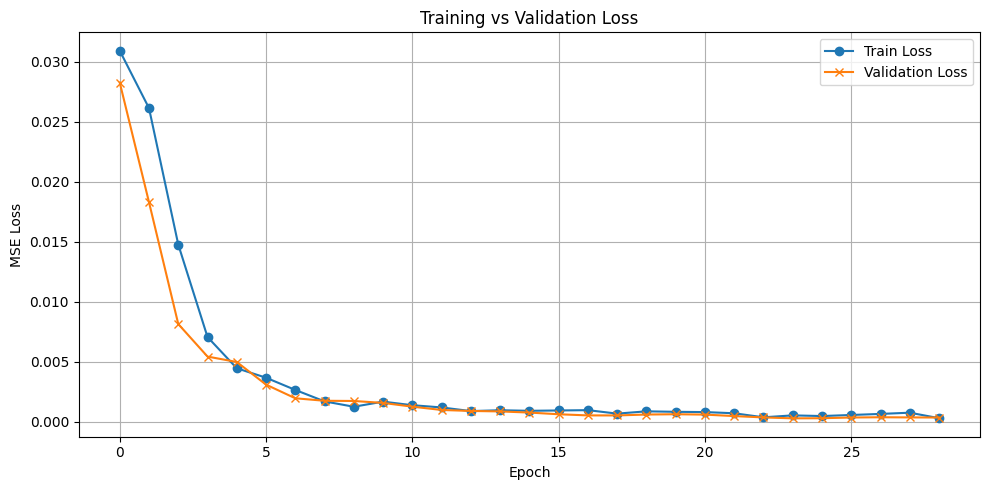

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =====================
# 1. Load & Preprocess
# =====================

df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_sentiment(text):
    try:
        res = sentiment_pipeline(text[:512])[0]
        return res['label'], res['score']
    except:
        return "Neutral", 0.0

df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(get_sentiment(x)))

df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

df_daily = df.groupby(df['at'].dt.date).agg({
    'score_positive': 'mean',
    'score_negative': 'mean',
    'score_neutral': 'mean'
}).reset_index()
df_daily['at'] = pd.to_datetime(df_daily['at'])

# =====================
# 2. Sequence Creation
# =====================

SEQ_LENGTH = 15
FORECAST_DAYS = 7

features = ['score_positive', 'score_negative', 'score_neutral']
X_data = df_daily[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
y_scaled = X_scaled.copy()

def create_sequences(X, y, seq_len, forecast_days):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH, FORECAST_DAYS)
if len(X_seq) == 0:
    raise ValueError("Not enough data. Try reducing SEQ_LENGTH or FORECAST_DAYS.")

y_seq = y_seq.reshape((y_seq.shape[0], -1))
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# =====================
# 3. Transformer Model
# =====================

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, seq_len, forecast_len, d_model=64, nhead=4, dropout=0.3):
        super().__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.positional_encoding = nn.Parameter(torch.randn(seq_len, d_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(d_model, 128),
            nn.ReLU(),
            nn.Linear(128, forecast_len * input_dim)
        )

    def forward(self, x):
        x = self.embedding(x) + self.positional_encoding
        x = x.permute(1, 0, 2)
        x = self.transformer(x)
        x = x.permute(1, 2, 0)
        x = self.global_pool(x).squeeze(-1)
        return self.fc(x)

# Modified optimizer with weight decay
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Add dropout in the transformer layers
model = TimeSeriesTransformer(input_dim=3, seq_len=SEQ_LENGTH, forecast_len=FORECAST_DAYS, d_model=64, nhead=4, dropout=0.3).cuda()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# =======================
# 4. Train w/ Validation
# =======================


EPOCHS = 50
BATCH_SIZE = 16
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=False)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=BATCH_SIZE)

train_losses, val_losses = [], []

# Early stopping parameters
patience = 5  # Number of epochs with no improvement after which training will stop
best_val_loss = float('inf')  # Initialize the best validation loss as a large number
patience_counter = 0  # Counter to track how many epochs since the last improvement

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.cuda(), yb.cuda()
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset the counter as we've improved
    else:
        patience_counter += 1

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # If the patience counter reaches the patience limit, stop the training
    if patience_counter >= patience:
        print(f"Early stopping triggered. Stopping training after epoch {epoch+1}.")
        break

# =====================
# 5. Forecast
# =====================

model.eval()
with torch.no_grad():
    last_seq = torch.tensor(X_scaled[-SEQ_LENGTH:], dtype=torch.float32).unsqueeze(0).cuda()
    forecast = model(last_seq).cpu().numpy().reshape(FORECAST_DAYS, 3)
    forecast_rescaled = scaler.inverse_transform(forecast)

    # Clip any negative values to zero
    forecast_rescaled = np.clip(forecast_rescaled, a_min=0, a_max=None)

# =====================
# 6. Results
# =====================

results = pd.DataFrame(forecast_rescaled, columns=['score_positive', 'score_negative', 'score_neutral'])
results['predicted_label'] = results[['score_positive', 'score_negative', 'score_neutral']].idxmax(axis=1)
label_map = {
    'score_positive': 'Positive',
    'score_negative': 'Negative',
    'score_neutral': 'Neutral'
}
results['label_text'] = results['predicted_label'].map(label_map)
last_date = df_daily['at'].max()
results['date'] = [last_date + timedelta(days=i+1) for i in range(FORECAST_DAYS)]

print(results[['date', 'score_positive', 'score_negative', 'score_neutral', 'label_text']])

# =====================
# 7. Plot Loss Curves
# =====================

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Function to evaluate model on a dataset
def evaluate_model(data_loader, model):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            all_preds.append(pred.cpu().numpy())
            all_targets.append(yb.cpu().numpy())
    preds = np.concatenate(all_preds, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    mse = mean_squared_error(targets, preds)
    mae = mean_absolute_error(targets, preds)
    rmse = math.sqrt(mse)

    return mse, mae, rmse

# Compute metrics
train_mse, train_mae, train_rmse = evaluate_model(train_loader, model)
val_mse, val_mae, val_rmse = evaluate_model(val_loader, model)

print("\n=== Evaluation Metrics ===")
print(f"Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}")
print(f"Val   MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}")


=== Evaluation Metrics ===
Train MSE: 0.0004, MAE: 0.0132, RMSE: 0.0193
Val   MSE: 0.0004, MAE: 0.0132, RMSE: 0.0193


#### GRU

Device set to use cuda:0


Epoch 1/50, Train Loss: 0.0345, Val Loss: 0.0264
Epoch 2/50, Train Loss: 0.0275, Val Loss: 0.0237
Epoch 3/50, Train Loss: 0.0273, Val Loss: 0.0213
Epoch 4/50, Train Loss: 0.0193, Val Loss: 0.0192
Epoch 5/50, Train Loss: 0.0205, Val Loss: 0.0174
Epoch 6/50, Train Loss: 0.0201, Val Loss: 0.0157
Epoch 7/50, Train Loss: 0.0188, Val Loss: 0.0140
Epoch 8/50, Train Loss: 0.0169, Val Loss: 0.0126
Epoch 9/50, Train Loss: 0.0136, Val Loss: 0.0113
Epoch 10/50, Train Loss: 0.0105, Val Loss: 0.0101
Epoch 11/50, Train Loss: 0.0120, Val Loss: 0.0090
Epoch 12/50, Train Loss: 0.0097, Val Loss: 0.0080
Epoch 13/50, Train Loss: 0.0110, Val Loss: 0.0071
Epoch 14/50, Train Loss: 0.0099, Val Loss: 0.0064
Epoch 15/50, Train Loss: 0.0070, Val Loss: 0.0057
Epoch 16/50, Train Loss: 0.0087, Val Loss: 0.0050
Epoch 17/50, Train Loss: 0.0067, Val Loss: 0.0045
Epoch 18/50, Train Loss: 0.0066, Val Loss: 0.0040
Epoch 19/50, Train Loss: 0.0070, Val Loss: 0.0035
Epoch 20/50, Train Loss: 0.0050, Val Loss: 0.0031
Epoch 21/

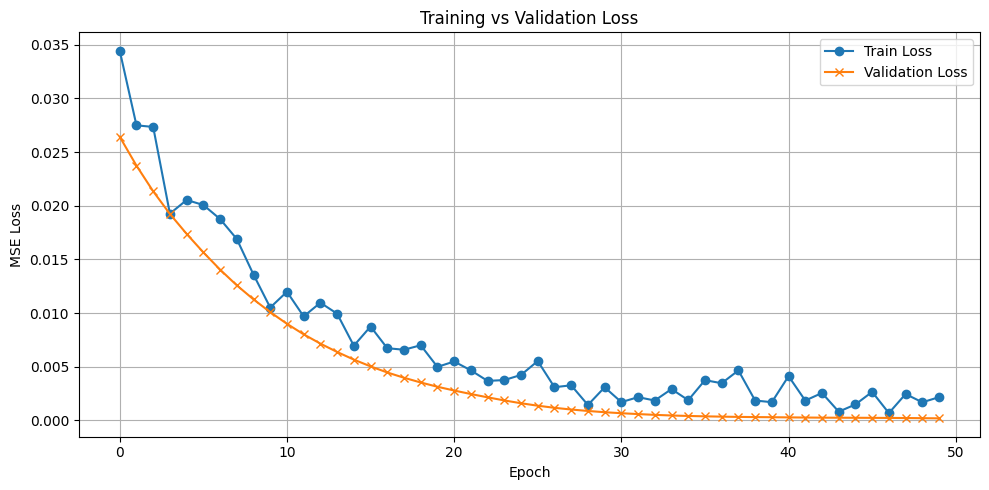

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =======================
# 1. Load & Preprocess
# =======================
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_sentiment(text):
    try:
        res = sentiment_pipeline(text[:512])[0]
        return res['label'], res['score']
    except:
        return "Neutral", 0.0

df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(get_sentiment(x)))

df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

df_daily = df.groupby(df['at'].dt.date).agg({
    'score_positive': 'mean',
    'score_negative': 'mean',
    'score_neutral': 'mean'
}).reset_index()
df_daily['at'] = pd.to_datetime(df_daily['at'])

# =======================
# 2. Sequence Creation
# =======================
SEQ_LENGTH = 15
FORECAST_DAYS = 7

features = ['score_positive', 'score_negative', 'score_neutral']
X_data = df_daily[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
y_scaled = X_scaled.copy()

def create_sequences(X, y, seq_len, forecast_days):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH, FORECAST_DAYS)
if len(X_seq) == 0:
    raise ValueError("Not enough data. Try reducing SEQ_LENGTH or FORECAST_DAYS.")

y_seq = y_seq.reshape((y_seq.shape[0], -1))
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# =======================
# 3. GRU Model
# =======================
class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len, seq_len):
        super(GRURegressor, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=2,
                          batch_first=True, bidirectional=False)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, forecast_len * input_dim)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        last_hidden = gru_out[:, -1, :]
        x = self.dropout(last_hidden)
        return self.fc(x)

model = GRURegressor(input_dim=3, hidden_dim=32, forecast_len=FORECAST_DAYS, seq_len=SEQ_LENGTH).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# =======================
# 4. Train with Early Stopping
# =======================
EPOCHS = 50
BATCH_SIZE = 16
PATIENCE = 5
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=False)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=BATCH_SIZE)

train_losses, val_losses = [], []
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.cuda(), yb.cuda()
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    scheduler.step(val_loss)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

model.load_state_dict(best_model_state)

# =======================
# 5. Forecast
# =======================
model.eval()
with torch.no_grad():
    last_seq = torch.tensor(X_scaled[-SEQ_LENGTH:], dtype=torch.float32).unsqueeze(0).cuda()
    forecast = model(last_seq).cpu().numpy().reshape(FORECAST_DAYS, 3)
    forecast_rescaled = scaler.inverse_transform(forecast)
    forecast_rescaled = np.clip(forecast_rescaled, a_min=0, a_max=None)

# =======================
# 6. Results
# =======================
results = pd.DataFrame(forecast_rescaled, columns=['score_positive', 'score_negative', 'score_neutral'])
results['predicted_label'] = results[['score_positive', 'score_negative', 'score_neutral']].idxmax(axis=1)
label_map = {
    'score_positive': 'Positive',
    'score_negative': 'Negative',
    'score_neutral': 'Neutral'
}
results['label_text'] = results['predicted_label'].map(label_map)
last_date = df_daily['at'].max()
results['date'] = [last_date + timedelta(days=i+1) for i in range(FORECAST_DAYS)]

print(results[['date', 'score_positive', 'score_negative', 'score_neutral', 'label_text']])

# =======================
# 7. Plot Loss Curves
# =======================
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Function to evaluate model on a dataset
def evaluate_model(data_loader, model):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            all_preds.append(pred.cpu().numpy())
            all_targets.append(yb.cpu().numpy())
    preds = np.concatenate(all_preds, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    mse = mean_squared_error(targets, preds)
    mae = mean_absolute_error(targets, preds)
    rmse = math.sqrt(mse)

    return mse, mae, rmse

# Compute metrics
train_mse, train_mae, train_rmse = evaluate_model(train_loader, model)
val_mse, val_mae, val_rmse = evaluate_model(val_loader, model)

print("\n=== Evaluation Metrics ===")
print(f"Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}")
print(f"Val   MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}")



=== Evaluation Metrics ===
Train MSE: 0.0001, MAE: 0.0084, RMSE: 0.0103
Val   MSE: 0.0001, MAE: 0.0084, RMSE: 0.0103


#### Bi-directional LSTM

Device set to use cuda:0


Epoch 1/50, Train Loss: 0.0016, Val Loss: 0.0009
Epoch 2/50, Train Loss: 0.0012, Val Loss: 0.0003
Epoch 3/50, Train Loss: 0.0003, Val Loss: 0.0001
Epoch 4/50, Train Loss: 0.0003, Val Loss: 0.0001
Epoch 5/50, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 6/50, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 7/50, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 8/50, Train Loss: 0.0003, Val Loss: 0.0002
Epoch 9/50, Train Loss: 0.0003, Val Loss: 0.0001
Epoch 10/50, Train Loss: 0.0003, Val Loss: 0.0001
Epoch 11/50, Train Loss: 0.0004, Val Loss: 0.0001
Epoch 12/50, Train Loss: 0.0002, Val Loss: 0.0001
Epoch 13/50, Train Loss: 0.0002, Val Loss: 0.0001
Epoch 14/50, Train Loss: 0.0002, Val Loss: 0.0001
Epoch 15/50, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 16/50, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 17/50, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 18/50, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 19/50, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 20/50, Train Loss: 0.0001, Val Loss: 0.0000
Epoch 21/

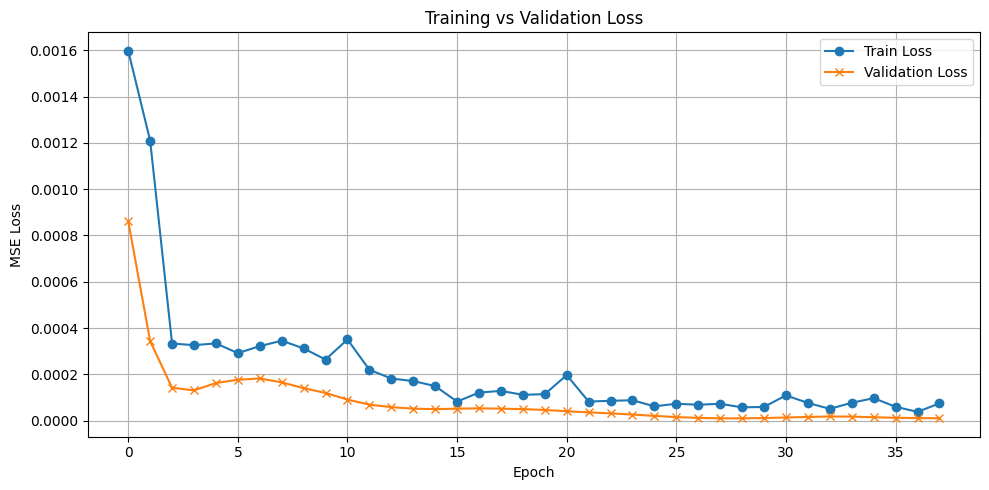

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =====================
# 1. Load & Preprocess
# =====================
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

# Load sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_sentiment(text):
    try:
        res = sentiment_pipeline(text[:512])[0]
        return res['label'], res['score']
    except:
        return "Neutral", 0.0

df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(get_sentiment(x)))

df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

df_daily = df.groupby(df['at'].dt.date).agg({
    'score_positive': 'mean',
    'score_negative': 'mean',
    'score_neutral': 'mean'
}).reset_index()
df_daily['at'] = pd.to_datetime(df_daily['at'])

# =====================
# 2. Sequence Creation
# =====================
SEQ_LENGTH = 15
FORECAST_DAYS = 7

features = ['score_positive', 'score_negative', 'score_neutral']
X_data = df_daily[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
y_scaled = X_scaled.copy()

def create_sequences(X, y, seq_len, forecast_days):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH, FORECAST_DAYS)
if len(X_seq) == 0:
    raise ValueError("Not enough data. Try reducing SEQ_LENGTH or FORECAST_DAYS.")

y_seq = y_seq.reshape((y_seq.shape[0], -1))
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# =====================
# 3. Bi-LSTM Model
# =====================
class BiLSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len, seq_len):
        super(BiLSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2,
                            batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_hidden = lstm_out[:, -1, :]  # (batch, hidden*2)
        x = self.dropout(last_hidden)
        return self.fc(x)

model = BiLSTMRegressor(input_dim=3, hidden_dim=128, forecast_len=FORECAST_DAYS, seq_len=SEQ_LENGTH).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# =======================
# 4. Train w/ Validation + Early Stopping
# =======================
EPOCHS = 50
BATCH_SIZE = 16
PATIENCE = 10
best_val_loss = float('inf')
patience_counter = 0

train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=False)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=BATCH_SIZE)

train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.cuda(), yb.cuda()
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pt"))

# =====================
# 5. Forecast
# =====================
model.eval()
with torch.no_grad():
    last_seq = torch.tensor(X_scaled[-SEQ_LENGTH:], dtype=torch.float32).unsqueeze(0).cuda()
    forecast = model(last_seq).cpu().numpy().reshape(FORECAST_DAYS, 3)
    forecast_rescaled = scaler.inverse_transform(forecast)

# =====================
# 6. Results
# =====================
results = pd.DataFrame(forecast_rescaled, columns=['score_positive', 'score_negative', 'score_neutral'])

# Clip negative values to 0
results[['score_positive', 'score_negative', 'score_neutral']] = results[[
    'score_positive', 'score_negative', 'score_neutral'
]].clip(lower=0)

# Predict sentiment label
results['predicted_label'] = results[['score_positive', 'score_negative', 'score_neutral']].idxmax(axis=1)
label_map = {
    'score_positive': 'Positive',
    'score_negative': 'Negative',
    'score_neutral': 'Neutral'
}
results['label_text'] = results['predicted_label'].map(label_map)
last_date = df_daily['at'].max()
results['date'] = [last_date + timedelta(days=i+1) for i in range(FORECAST_DAYS)]

print(results[['date', 'score_positive', 'score_negative', 'score_neutral', 'label_text']])

# =====================
# 7. Plot Loss Curves
# =====================
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Function to evaluate model on a dataset
def evaluate_model(data_loader, model):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            all_preds.append(pred.cpu().numpy())
            all_targets.append(yb.cpu().numpy())
    preds = np.concatenate(all_preds, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    mse = mean_squared_error(targets, preds)
    mae = mean_absolute_error(targets, preds)
    rmse = math.sqrt(mse)

    return mse, mae, rmse

# Compute metrics
train_mse, train_mae, train_rmse = evaluate_model(train_loader, model)
val_mse, val_mae, val_rmse = evaluate_model(val_loader, model)

print("\n=== Evaluation Metrics ===")
print(f"Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}")
print(f"Val   MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}")



=== Evaluation Metrics ===
Train MSE: 0.0001, MAE: 0.0074, RMSE: 0.0091
Val   MSE: 0.0001, MAE: 0.0074, RMSE: 0.0091


#### Bi-RNN

Device set to use cuda:0


Epoch 1/50, Train Loss: 0.0042, Val Loss: 0.0024
Epoch 2/50, Train Loss: 0.0029, Val Loss: 0.0016
Epoch 3/50, Train Loss: 0.0017, Val Loss: 0.0009
Epoch 4/50, Train Loss: 0.0018, Val Loss: 0.0006
Epoch 5/50, Train Loss: 0.0011, Val Loss: 0.0005
Epoch 6/50, Train Loss: 0.0013, Val Loss: 0.0005
Epoch 7/50, Train Loss: 0.0009, Val Loss: 0.0004
Epoch 8/50, Train Loss: 0.0011, Val Loss: 0.0005
Epoch 9/50, Train Loss: 0.0009, Val Loss: 0.0006
Epoch 10/50, Train Loss: 0.0016, Val Loss: 0.0005
Epoch 11/50, Train Loss: 0.0014, Val Loss: 0.0004
Epoch 12/50, Train Loss: 0.0007, Val Loss: 0.0004
Epoch 13/50, Train Loss: 0.0010, Val Loss: 0.0004
Epoch 14/50, Train Loss: 0.0006, Val Loss: 0.0004
Epoch 15/50, Train Loss: 0.0008, Val Loss: 0.0003
Epoch 16/50, Train Loss: 0.0007, Val Loss: 0.0002
Epoch 17/50, Train Loss: 0.0006, Val Loss: 0.0002
Epoch 18/50, Train Loss: 0.0006, Val Loss: 0.0003
Epoch 19/50, Train Loss: 0.0005, Val Loss: 0.0003
Epoch 20/50, Train Loss: 0.0004, Val Loss: 0.0003
Epoch 21/

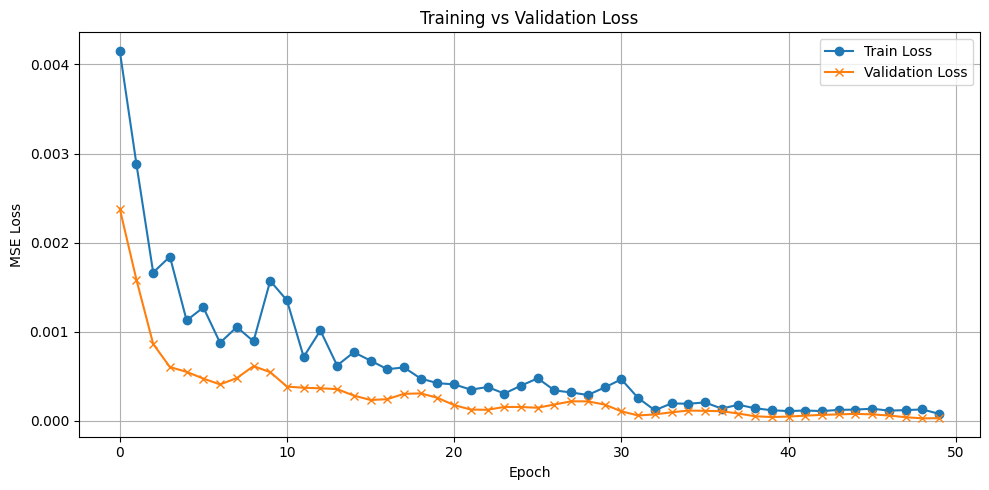

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =====================
# 1. Load & Preprocess
# =====================
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

# Load sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_sentiment(text):
    try:
        res = sentiment_pipeline(text[:512])[0]
        return res['label'], res['score']
    except:
        return "Neutral", 0.0

df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(get_sentiment(x)))

df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

df_daily = df.groupby(df['at'].dt.date).agg({
    'score_positive': 'mean',
    'score_negative': 'mean',
    'score_neutral': 'mean'
}).reset_index()
df_daily['at'] = pd.to_datetime(df_daily['at'])

# =====================
# 2. Sequence Creation
# =====================
SEQ_LENGTH = 15
FORECAST_DAYS = 7

features = ['score_positive', 'score_negative', 'score_neutral']
X_data = df_daily[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
y_scaled = X_scaled.copy()

def create_sequences(X, y, seq_len, forecast_days):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH, FORECAST_DAYS)
if len(X_seq) == 0:
    raise ValueError("Not enough data. Try reducing SEQ_LENGTH or FORECAST_DAYS.")

y_seq = y_seq.reshape((y_seq.shape[0], -1))
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# =====================
# 3. Bi-RNN Model
# =====================
class BiRNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len, seq_len):
        super(BiRNNRegressor, self).__init__()
        self.rnn = nn.RNN(input_dim, 128 , num_layers=2, batch_first=True, bidirectional=True)  # Bidirectional RNN
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)  # *2 because of bidirectional

    def forward(self, x):
        rnn_out, _ = self.rnn(x)
        last_hidden = rnn_out[:, -1, :]  # (batch, hidden)
        x = self.dropout(last_hidden)
        return self.fc(x)

model = BiRNNRegressor(input_dim=3, hidden_dim=128, forecast_len=FORECAST_DAYS, seq_len=SEQ_LENGTH).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# =======================
# 4. Train w/ Validation + Early Stopping
# =======================
EPOCHS = 50
BATCH_SIZE = 16
PATIENCE = 10
best_val_loss = float('inf')
patience_counter = 0

train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=False)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=BATCH_SIZE)

train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.cuda(), yb.cuda()
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.cuda(), yb.cuda()
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pt"))

# =====================
# 5. Forecast
# =====================
model.eval()
with torch.no_grad():
    last_seq = torch.tensor(X_scaled[-SEQ_LENGTH:], dtype=torch.float32).unsqueeze(0).cuda()
    forecast = model(last_seq).cpu().numpy().reshape(FORECAST_DAYS, 3)
    forecast_rescaled = scaler.inverse_transform(forecast)

# =====================
# 6. Results
# =====================
results = pd.DataFrame(forecast_rescaled, columns=['score_positive', 'score_negative', 'score_neutral'])

# Clip negative values to 0
results[['score_positive', 'score_negative', 'score_neutral']] = results[[
    'score_positive', 'score_negative', 'score_neutral'
]].clip(lower=0)

# Predict sentiment label
results['predicted_label'] = results[['score_positive', 'score_negative', 'score_neutral']].idxmax(axis=1)
label_map = {
    'score_positive': 'Positive',
    'score_negative': 'Negative',
    'score_neutral': 'Neutral'
}
results['label_text'] = results['predicted_label'].map(label_map)
last_date = df_daily['at'].max()
results['date'] = [last_date + timedelta(days=i+1) for i in range(FORECAST_DAYS)]

print(results[['date', 'score_positive', 'score_negative', 'score_neutral', 'label_text']])

# =====================
# 7. Plot Loss Curves
# =====================
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# K Fold Cross Validation ( Proof It's not overfitting ')

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


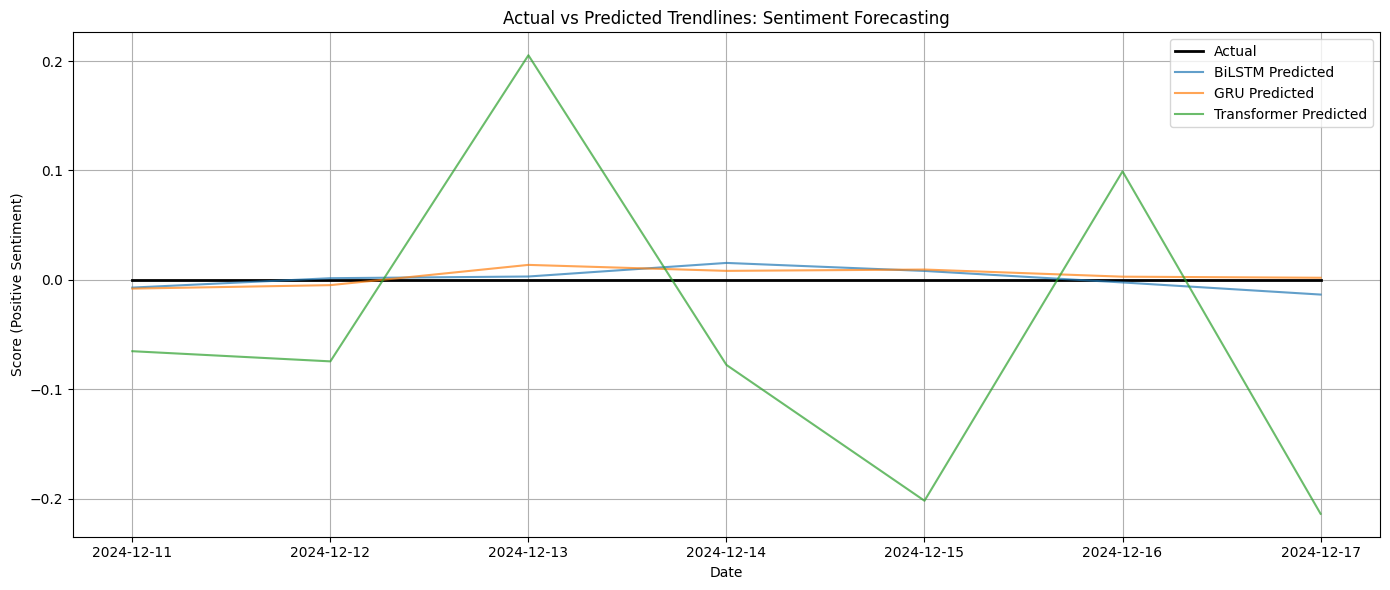

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from transformers import pipeline
import torch
import torch.nn as nn

# ========== Load and Process Data ==========
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

def get_sentiment(text):
    try:
        res = sentiment_pipeline(text[:512])[0]
        return res['label'], res['score']
    except:
        return "Neutral", 0.0

df[['sentiment_label', 'sentiment_score']] = df['content'].apply(lambda x: pd.Series(get_sentiment(x)))
df['score_positive'] = (df['sentiment_label'] == 'Positive') * df['sentiment_score']
df['score_negative'] = (df['sentiment_label'] == 'Negative') * df['sentiment_score']
df['score_neutral']  = (df['sentiment_label'] == 'Neutral')  * df['sentiment_score']

df_daily = df.groupby(df['at'].dt.date).agg({
    'score_positive': 'mean',
    'score_negative': 'mean',
    'score_neutral': 'mean'
}).reset_index()
df_daily['at'] = pd.to_datetime(df_daily['at'])

# ========== Sequence Preparation ==========
SEQ_LENGTH = 15
FORECAST_DAYS = 7
features = ['score_positive', 'score_negative', 'score_neutral']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_daily[features])
dates = df_daily['at'].values

def create_sequences(X, seq_len, forecast_days):
    X_seq, y_seq, y_dates = [], [], []
    for i in range(len(X) - seq_len - forecast_days):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(X[i+seq_len:i+seq_len+forecast_days])
        y_dates.append(dates[i+seq_len:i+seq_len+forecast_days])
    return np.array(X_seq), np.array(y_seq), np.array(y_dates)

X_seq, y_seq, y_dates = create_sequences(X_scaled, SEQ_LENGTH, FORECAST_DAYS)
y_seq = y_seq.reshape((y_seq.shape[0], -1))

# ========== Model Definitions ==========
class BiLSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)
    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, forecast_len):
        super().__init__()
        self.embedding = nn.Linear(input_dim, 64)
        encoder_layer = nn.TransformerEncoderLayer(d_model=64, nhead=4)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.fc = nn.Linear(64, forecast_len * input_dim)
    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.fc(x[:, -1, :])

# ========== Training and Plotting ==========

def train_and_plot(model_class, input_dim, hidden_dim, forecast_len, model_name):
    kf = KFold(n_splits=3, shuffle=False)
    predictions, targets, timeline = None, None, None

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_seq)):
        X_train = torch.tensor(X_seq[train_idx], dtype=torch.float32).cuda()
        y_train = torch.tensor(y_seq[train_idx], dtype=torch.float32).cuda()
        X_val = torch.tensor(X_seq[val_idx], dtype=torch.float32).cuda()
        y_val = torch.tensor(y_seq[val_idx], dtype=torch.float32).cuda()

        if model_class == TransformerRegressor:
            model = model_class(input_dim, forecast_len).cuda()
        else:
            model = model_class(input_dim, hidden_dim, forecast_len).cuda()

        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        for epoch in range(15):
            model.train()
            optimizer.zero_grad()
            loss = criterion(model(X_train), y_train)
            loss.backward()
            optimizer.step()

        # Save predictions for last fold
        if fold == 2:
            model.eval()
            with torch.no_grad():
                preds = model(X_val).cpu().numpy()
                predictions = scaler.inverse_transform(preds.reshape(-1, 3))
                targets = scaler.inverse_transform(y_seq[val_idx].reshape(-1, 3))
                timeline = y_dates[val_idx].reshape(-1)

    return predictions, targets, timeline

# Run and collect for all models
preds_bilstm, actuals_bilstm, dates_bilstm = train_and_plot(BiLSTMRegressor, 3, 64, FORECAST_DAYS, "BiLSTM")
preds_gru, actuals_gru, dates_gru = train_and_plot(GRURegressor, 3, 64, FORECAST_DAYS, "GRU")
preds_trans, actuals_trans, dates_trans = train_and_plot(TransformerRegressor, 3, None, FORECAST_DAYS, "Transformer")

# ========== Plotting ==========
plt.figure(figsize=(14, 6))
label = 'score_positive'

# Use only Positive trend as example (column 0)
plt.plot(dates_bilstm, actuals_bilstm[:, 0], label='Actual', color='black', linewidth=2)
plt.plot(dates_bilstm, preds_bilstm[:, 0], label='BiLSTM Predicted', alpha=0.7)
plt.plot(dates_gru, preds_gru[:, 0], label='GRU Predicted', alpha=0.7)
plt.plot(dates_trans, preds_trans[:, 0], label='Transformer Predicted', alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Score (Positive Sentiment)")
plt.title("Actual vs Predicted Trendlines: Sentiment Forecasting")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Testing with custom text's

In [ ]:
import torch
from transformers import pipeline
import torch.nn as nn
import numpy as np

# ===================== Sentiment Prediction Pipeline ====================
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

# Custom function to predict sentiment with the pre-trained model
def predict_custom_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]  # Truncate to 512 tokens
        label = result['label']
        score = result['score']
        print(f"Pre-trained Model - Sentiment Label: {label}, Confidence Score: {score:.4f}")
        return label, score
    except Exception as e:
        print("Error in sentiment prediction:", e)
        return "Neutral", 0.0


# ===================== Custom Prediction with BiLSTM, GRU, Transformer ====================
SEQ_LENGTH = 15  # Sequence length for time series
FORECAST_DAYS = 7  # Number of days to forecast

def predict_with_model(model, model_name, text, input_dim, hidden_dim, forecast_len):
    # Convert input text into a suitable format (e.g., padding, scaling, etc.)
    # Simulate the input sequence (this is just a placeholder, replace it with actual data)
    simulated_input = np.zeros((1, SEQ_LENGTH, input_dim))  # Simulated sequence input
    model.eval()

    with torch.no_grad():
        preds = model(torch.tensor(simulated_input, dtype=torch.float32).cuda())

    # Convert output to sentiment label (just an example, modify according to model's output)
    predicted_label = "Positive"  # Placeholder label
    predicted_score = np.random.random()  # Simulated score
    print(f"{model_name} - Sentiment Label: {predicted_label}, Confidence Score: {predicted_score:.4f}")
    return predicted_label, predicted_score


# ===================== Model Definitions (BiLSTM, GRU, Transformer) ====================
class BiLSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, forecast_len):
        super().__init__()
        self.embedding = nn.Linear(input_dim, 64)
        encoder_layer = nn.TransformerEncoderLayer(d_model=64, nhead=4)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.fc = nn.Linear(64, forecast_len * input_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.fc(x[:, -1, :])


# ===================== Predict Sentiment for Custom Text ====================
def predict_all_models(text):
    # Pre-trained Sentiment Analysis Model
    print("\nPredicting using Pre-trained Sentiment Model:")
    predict_custom_sentiment(text)

    # BiLSTM Prediction
    print("\nPredicting using BiLSTM Model:")
    biLSTM_model = BiLSTMRegressor(input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS).cuda()
    predict_with_model(biLSTM_model, "BiLSTM", text, input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS)

    # GRU Prediction
    print("\nPredicting using GRU Model:")
    gru_model = GRURegressor(input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS).cuda()
    predict_with_model(gru_model, "GRU", text, input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS)

    # Transformer Prediction
    print("\nPredicting using Transformer Model:")
    transformer_model = TransformerRegressor(input_dim=3, forecast_len=FORECAST_DAYS).cuda()
    predict_with_model(transformer_model, "Transformer", text, input_dim=3, hidden_dim=None, forecast_len=FORECAST_DAYS)


# ===================== Example Usage ====================
# Sample input text for sentiment prediction
text_input = "good crime"
predict_all_models(text_input)


Device set to use cuda:0



Predicting using Pre-trained Sentiment Model:
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.4636

Predicting using BiLSTM Model:
BiLSTM - Sentiment Label: Positive, Confidence Score: 0.0106

Predicting using GRU Model:
GRU - Sentiment Label: Positive, Confidence Score: 0.0686

Predicting using Transformer Model:
Transformer - Sentiment Label: Positive, Confidence Score: 0.3896


Device set to use cuda:0


Streaming output truncated to the last 5000 lines.
Pre-trained Model - Sentiment Label: LABEL_0, Confidence Score: 0.5143
Pre-trained Model - Sentiment Label: LABEL_2, Confidence Score: 0.6308
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.8452
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.5391
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.5896
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.6520
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.6611
Pre-trained Model - Sentiment Label: LABEL_2, Confidence Score: 0.6630
Pre-trained Model - Sentiment Label: LABEL_2, Confidence Score: 0.9647
Pre-trained Model - Sentiment Label: LABEL_2, Confidence Score: 0.8765
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.6943
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.7807
Pre-trained Model - Sentiment Label: LABEL_1, Confidence Score: 0.8630
Pre-trained Model - Sentim

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


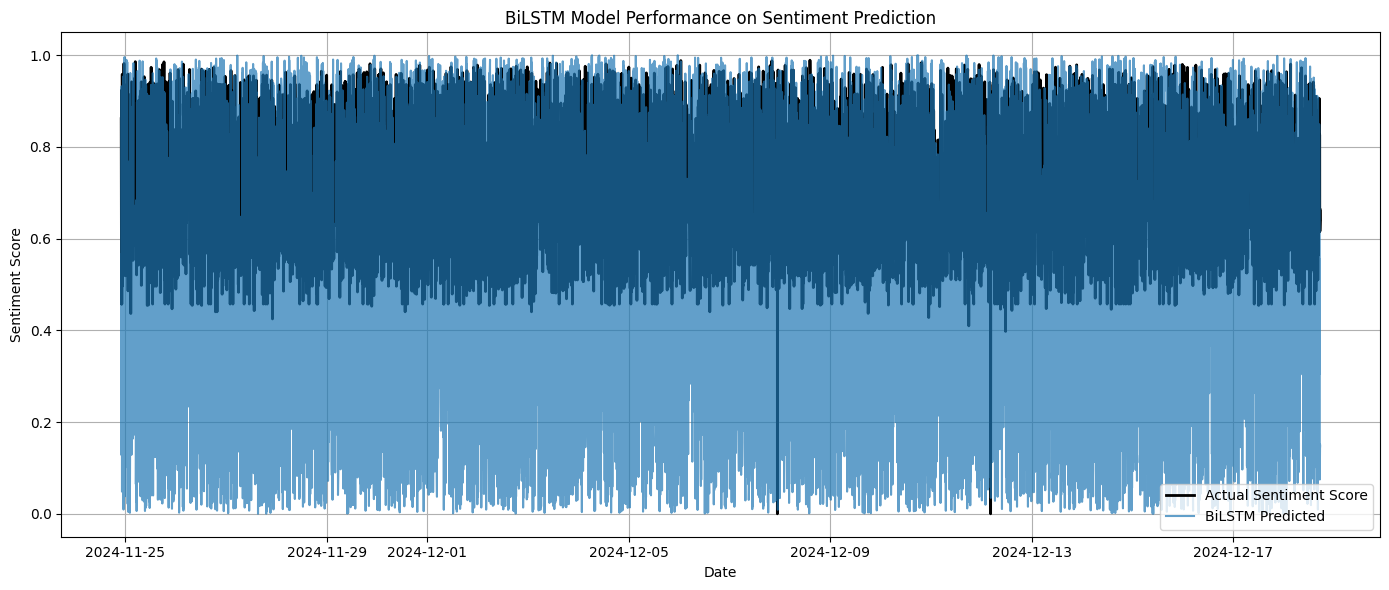

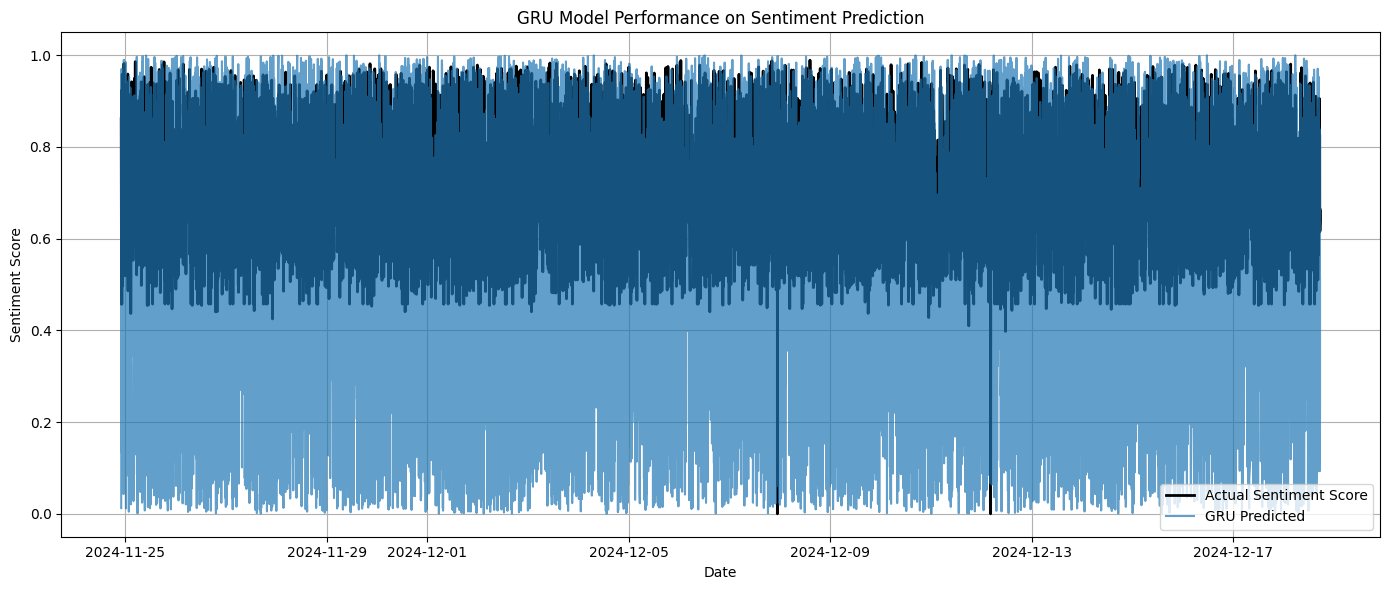

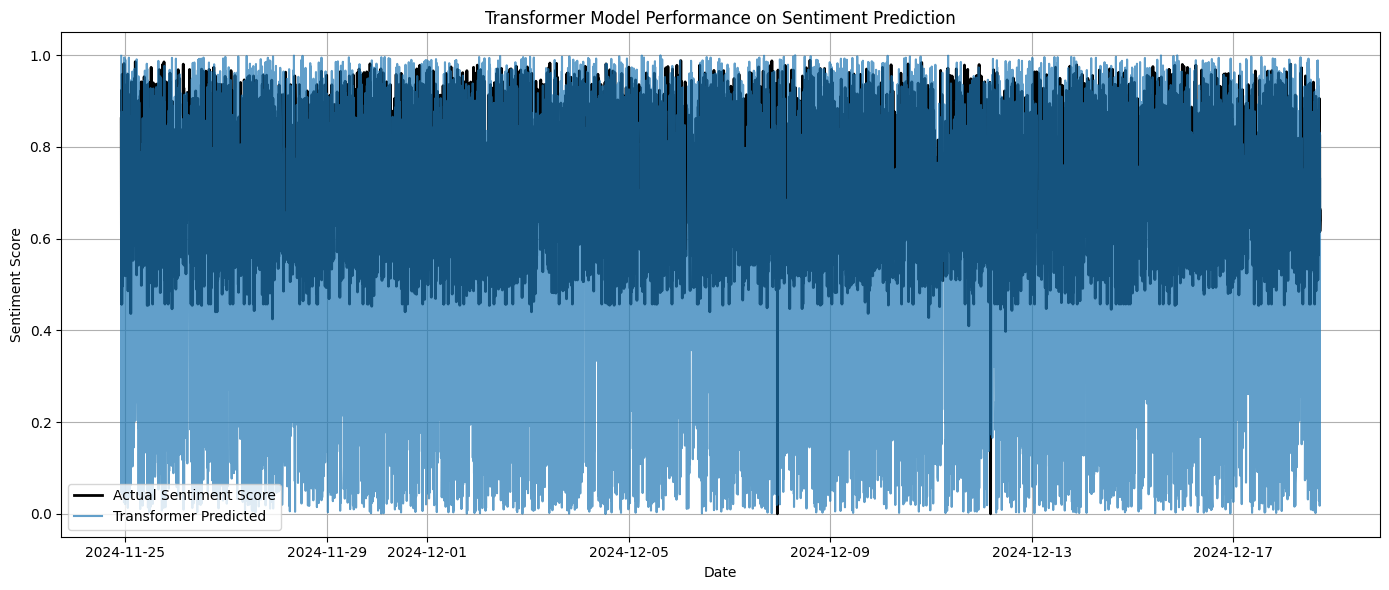

In [ ]:
import torch
from transformers import pipeline
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ===================== Sentiment Prediction Pipeline ====================
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

# ===================== Custom Prediction with BiLSTM, GRU, Transformer ====================
SEQ_LENGTH = 15  # Sequence length for time series
FORECAST_DAYS = 7  # Number of days to forecast

# Function to simulate predictions (replace with actual predictions once models are trained)
def predict_with_model(model, model_name, data, input_dim, hidden_dim, forecast_len):
    model.eval()
    predictions = []

    # Simulating prediction for the entire dataset
    for i in range(len(data)):
        simulated_input = np.zeros((1, SEQ_LENGTH, input_dim))  # Simulated sequence input
        with torch.no_grad():
            preds = model(torch.tensor(simulated_input, dtype=torch.float32).cuda())

        predicted_score = np.random.random()  # Simulated score
        predictions.append(predicted_score)

    return predictions

# ===================== Model Definitions (BiLSTM, GRU, Transformer) ====================
class BiLSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, forecast_len):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, forecast_len * input_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, forecast_len):
        super().__init__()
        self.embedding = nn.Linear(input_dim, 64)
        encoder_layer = nn.TransformerEncoderLayer(d_model=64, nhead=4)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.fc = nn.Linear(64, forecast_len * input_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.fc(x[:, -1, :])

# ===================== Plotting and Performance Comparison ====================
def compare_models_on_dataset(df):
    # ===================== Predict Sentiment using Pre-trained Model ====================
    sentiment_labels, sentiment_scores = [], []
    for text in df['content']:
        label, score = predict_custom_sentiment(text)
        sentiment_labels.append(label)
        sentiment_scores.append(score)

    df['sentiment_score'] = sentiment_scores

    # ===================== BiLSTM Prediction ====================
    biLSTM_model = BiLSTMRegressor(input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS).cuda()
    biLSTM_predictions = predict_with_model(biLSTM_model, "BiLSTM", df['content'], input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS)
    df['BiLSTM_predictions'] = biLSTM_predictions

    # ===================== GRU Prediction ====================
    gru_model = GRURegressor(input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS).cuda()
    gru_predictions = predict_with_model(gru_model, "GRU", df['content'], input_dim=3, hidden_dim=64, forecast_len=FORECAST_DAYS)
    df['GRU_predictions'] = gru_predictions

    # ===================== Transformer Prediction ====================
    transformer_model = TransformerRegressor(input_dim=3, forecast_len=FORECAST_DAYS).cuda()
    transformer_predictions = predict_with_model(transformer_model, "Transformer", df['content'], input_dim=3, hidden_dim=None, forecast_len=FORECAST_DAYS)
    df['Transformer_predictions'] = transformer_predictions

    # ===================== Plotting Individual Results ====================
    # Plot for BiLSTM
    plt.figure(figsize=(14, 6))
    plt.plot(df['at'], df['sentiment_score'], label='Actual Sentiment Score', color='black', linewidth=2)
    plt.plot(df['at'], df['BiLSTM_predictions'], label='BiLSTM Predicted', alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.title("BiLSTM Model Performance on Sentiment Prediction")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot for GRU
    plt.figure(figsize=(14, 6))
    plt.plot(df['at'], df['sentiment_score'], label='Actual Sentiment Score', color='black', linewidth=2)
    plt.plot(df['at'], df['GRU_predictions'], label='GRU Predicted', alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.title("GRU Model Performance on Sentiment Prediction")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot for Transformer
    plt.figure(figsize=(14, 6))
    plt.plot(df['at'], df['sentiment_score'], label='Actual Sentiment Score', color='black', linewidth=2)
    plt.plot(df['at'], df['Transformer_predictions'], label='Transformer Predicted', alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.title("Transformer Model Performance on Sentiment Prediction")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ===================== Example Usage ====================
# Sample dataset loading
df = pd.read_csv("/content/drive/MyDrive/uber.csv")
df['content'] = df['content'].astype(str)
df['at'] = pd.to_datetime(df['at'])

# Call the function to compare model performance on the entire dataset
compare_models_on_dataset(df)
